## Data Analysis

In [44]:
import pandas as pd
from matplotlib import pyplot as plt
from data import get_data
from model import load_model_data
plt.style.use('ggplot')

In [78]:
X, y = get_data(include_date = True)
df = X.copy()
X.drop(columns = ['date'], inplace = True)
df['total'] = y.copy()
df.head()

,date,month,day_of_month,day_of_week,precip_intensity_max,precip_intensity_avg,precip_type,wind_speed_max,wind_speed_avg,gust_max,gust_avg,temp_min,temp_max,temp_avg,temp_day,temp_night,humidity,total
0,2018-02-03,2,3,6,0.1336,0.019,1,3.27,3.25,10.24,4.03,0.18,2.84,1.58,2.84,-3.10,0.83,45
1,2018-02-24,2,24,6,0.0000,0.000,0,8.92,8.92,12.12,8.92,-9.05,-0.76,-5.33,-0.76,-9.69,0.60,34
2,2018-03-03,3,3,6,0.1913,0.014,2,5.05,5.08,11.21,5.79,-7.17,0.50,-3.55,0.50,-2.01,0.86,45
3,2018-02-05,2,5,1,0.0000,0.000,0,7.72,7.74,9.97,7.84,-4.58,-1.02,-2.71,-1.02,-5.55,0.74,47
4,2018-03-05,3,5,1,0.0000,0.000,0,4.75,4.76,6.02,4.81,-1.14,6.35,2.27,6.35,1.42,0.87,42


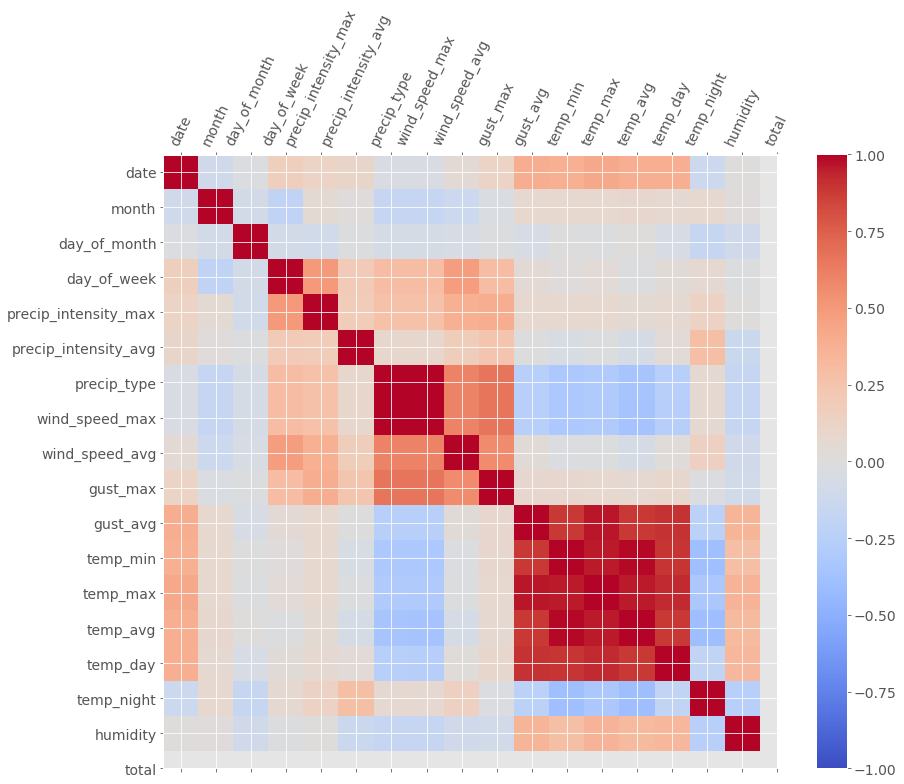

In [50]:
f = plt.figure(figsize = (14, 11))
plt.matshow(df.corr(), fignum = f.number, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=65)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

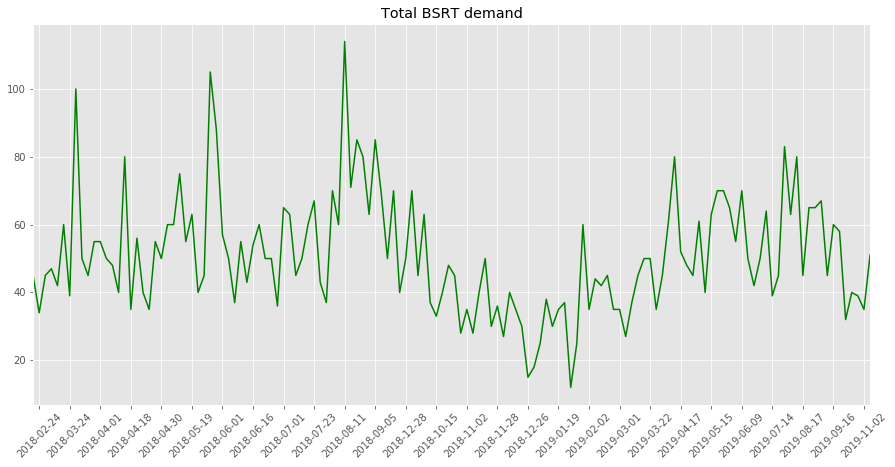

In [51]:
xticks = list(range(1, len(df.index), 5))
ax = df.total.plot(figsize = (15, 7), title = 'Total BSRT demand', rot = 45, xticks = xticks, color = 'green')
ax.set_xticklabels(df.date[xticks])
plt.show()

## Visualising model performance

In [63]:
def earlier_than(date1: str, date2: str):
    from datetime import datetime
    date1, date2 = datetime.strptime(date1, '%Y-%m-%d'), datetime.strptime(date2, '%Y-%m-%d')
    return date1 < date2

In [107]:
def viz_model(model_fname: str = 'random_forest', cutoff_date = '2019-09-01'):
    train_idxs = [idx for idx, date in zip(df.index, df.date) if earlier_than(date, cutoff_date)]
    
    X_train, X_val = X.iloc[train_idxs, :], X.iloc[list(set(df.index) - set(train_idxs)), :]
    y_train, y_val = y[train_idxs], y[list(set(df.index) - set(train_idxs))]
    idxs = sorted(X_val.index)

    model = load_model_data(model_fname)['model'].fit(X_train, y_train)
    
    fig, ax = plt.subplots(figsize = (15, 7))
    plt.plot(df.date[idxs], df.total[idxs], label = 'true', color = 'grey')
    plt.plot(df.date[idxs], model.predict(X_val), label = 'prediction', color = 'blue')
    plt.legend(fontsize = 17)
    plt.xticks(rotation = 60)
    plt.title(f'Predictions - {type(model).__name__}', fontsize = 18)  
    
    plt.show()

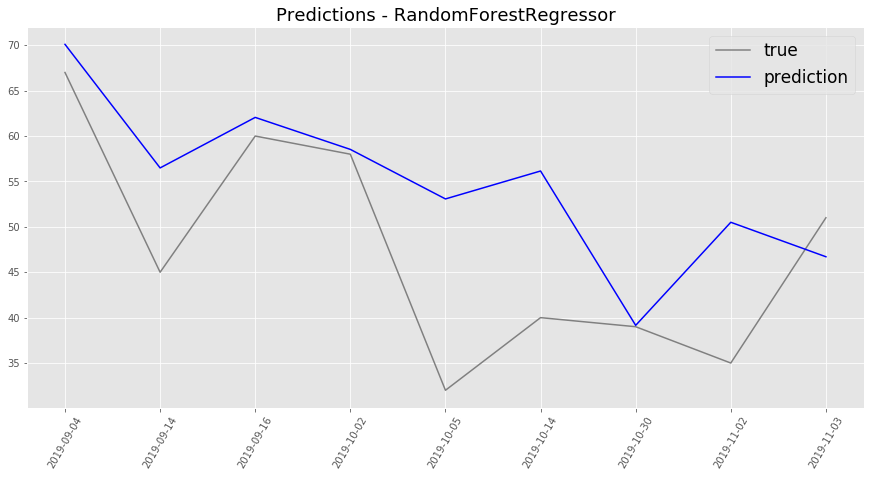

In [113]:
viz_model('random_forest', cutoff_date = '2019-09-01')

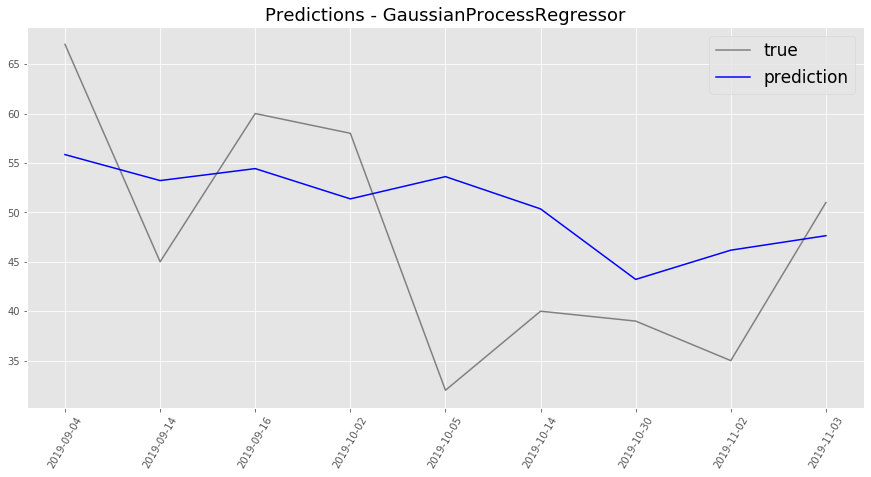

In [105]:
viz_model('gaussian_process', cutoff_date = '2019-09-01')